In [1]:
import numpy as np
import sisl
import z2pack
import matplotlib.pyplot as plt
%matplotlib inline

# TI-02: $\mathbb{Z}_2$ Topological Invariant
In this exercise, we will use Z2Pack to calculate the $\mathbb{Z}_2$ topological invariant of bismuthene. Exercise TI-01 is a prerequisite. Most of the discussion below follows the work of Gresh et al. [[Gresh2017](https://doi.org/10.1103/PhysRevB.95.075146)]. 

## Introduction

### Hybrid Wannier Charge Centers

Topological invariants are calculated in Z2Pack [[Gresh2017](https://doi.org/10.1103/PhysRevB.95.075146)] using Hybrid Wannier Charge Centers (HWCC), which are defined in terms of Hybrid Wannier Functions (HWF). The difference between HWFs and Wannier Functions is that the former are localized only in one direction (for instance, $x$) and delocalized in the others. In 2D, a Hybrid Wannier Function can be written as: 

\begin{align}
|n, l_x, k_y\rangle = \frac{1}{2\pi}\int\mathrm{d}k_x\; e^{i k_x l_x a_x}|\psi^n_{k_x,k_y}\rangle
\end{align}

where $n$ is the band index, $l_x$ is an integer, and $a_x$ is the lattice constant along the direction in which the wavefunction is localized ($x$). The charge center of an HWF is defined as the average position of the function along $x$. The **Hybrid Wannier Charge Centers** are defined modulo the lattice constant as:  

\begin{align}
\bar x_n(k_y) = \langle n, 0, k_y| \hat{x} | n, 0, k_y\rangle   \quad (\textrm{mod}\,a_x)
\end{align}

One can think of an HWCC as the charge center of a Wannier Function in a 1D system, coupled to an external parameter $k_y$. In this interpretation, the sum of all HWCCs is directly linked to the 1D hybrid electronic polarization (eq. 19 in [[Gresh2017](https://doi.org/10.1103/PhysRevB.95.075146)])

\begin{align}
\mathbf{P}^h_e(k_y) = e \sum_n \bar x_n(k_y)
\end{align}

It should be noted that individual HWCCs are not gauge-invariant. The sum of all HWCCs and $\mathbf{P}^h_e(k_y)$ are gauge-invariant. 

### From HWCC to topological invariants
#### Chern number

Since the HWCCs are defined modulo the lattice constant $a_x$, we can assume periodic boundary conditions $\bar x(k_y) = \bar x(k_y) + a_x$. In this way, $\bar x(k_y)$ can be mapped on a point on the unit circle for any given $k_y$. As $k_y$ goes from 0 to $2\pi$ the HWCCs and electronic polarization $P^h_e$ describe trajectories on a cylinder. The winding number of the trajectory of $P^h_e$ gives the Chern number of the system (Fig. 1). 

A Chern number can also be uniquely associated with any set of **isolated bands** and corresponds to the number of windings of the polarization of the subset of states. The Chern number of the whole system is equal to the sum of the individual Chern numbers.

|<img src="img/FIG_2_Gresch_PhyRevB95_075146_2017.png" alt="Sketch of some possible evolutions of  $P^h_e$" style="width: 400px;"/>|
|:---|
|Fig 1: Sketch of some possible evolutions of electronic polarization $P^h_e$ as a function of $k_y$ on a unrolled (top) or rolled (bottom) cylinder [[Gresh2017](https://doi.org/10.1103/PhysRevB.95.075146)]|

#### Time-reversal invariance and the $\mathbb{Z}_2$-invariant

Under time-reversal symmetry, the Hilbert space of occupied states can be split into two subspaces which are mapped onto each other by time-reversal. This splits all Kramer pairs into states which are assigned to different subspaces. The Chern number $C_1$, $C_2$ of the subspaces are not uniquely defined and depend on which states are assigned to which subspace. However, as a consequence of the Chern number being odd under time-reversal, the two Chern numbers are always opposite $C_1=-C_2$, i.e. the Chern number of the full system is always zero.

Further, the two states forming a Kramer pair have to carry opposite Chern numbers. Hence, if the states exchange subspaces, the two Chern numbers can only change by an even number and the $\mathbb{Z}_2$ invariant

\begin{align}
\Delta = (C_1 - C_2)\,/\,2 \quad (\textrm{mod}\,2)
\end{align}
is well defined.


In 3D systems, a single invariant is not enough to characterize a material and a set 4 indices
\begin{equation}
\nu; (\nu_x, \nu_y, \nu_z),
\end{equation}
is used instead. These indices are defined in terms of the $\mathbf{Z}_2$ invariants of 2D cuts through the reciprocal cell. Each cut is obtained by fixing one component of the $k$-vector. The four indices are defined as

\begin{align}
\nu &= \Delta(k_i=0) + \Delta(k_i=0.5) \quad (\textrm{mod}\,2),\\
\nu_i &= \Delta, 
\end{align}

where $k_i$ is in reduced coordinates. A material is called a weak topological insulator if any of the $\nu_i$ are non-zero, and a strong insulator if $\nu$ is non-zero.



#### Numerical computation of winding numbers

In order to determine the winding number, we can "unroll" the cylinder and count the number of times the trajectory jumps from one side to the other. For instance, if the trajectory jumps from $\bar{x}=a_x$ to $\bar{x}=0$ the winding number increases by one. Instead, for a jump in the opposite direction, the winding number decreases by one. Given that the $\mathbb{Z}_2$ invariant is defined modulo 2, we can neglect the direction of the jump and simply count the number of times the trajectory crosses $\bar{x}=0$. In fact, it is possible to choose any line $f(k_y)$ and count the number of intersections, as long as the line connects the two ends of the cylinder (Fig. 2).

Due to time-reversal symmetry, the HWCC trajectories of a Kramer pair ($i$,$j$) on the each half of the cylinder are related by: 

\begin{equation}
\bar x_j\left(\frac{\pi}{a_y} + k_y\right) = \bar x_i\left(\frac{\pi}{a_y}-k_y\right) \quad(\textrm{mod}\,a_x).
\end{equation}

It is, hence, sufficient to count the intersection on one half of the cylinder.

|<img src="img/FIG_5_Gresch_PhyRevB95_075146_2017.png" alt="Sketch of some possible evolutions of HWCCs" style="width: 400px;"/>|
|:---|
|Fig 2: Sketch of possible evolutions of HWCCs (red and blue lines) for a system with two occupied bands and time-reversal symmetry. The $\mathbb{Z}_2$ invariant can be calculated via the number of crossings of the trajectory with the arbitrary line $f(k_y)$ (dotted green), or the line formed by the center of the *largest gap* $g(k_y)$ (orange). Adapted from [[Gresh2017](https://doi.org/10.1103/PhysRevB.95.075146)]|


Our discussion so far has focused on continuous trajectories. However, unless we are dealing with a model in which the dependence on $k_x$ and $k_y$ can be expressed analytically, wavefunctions and HWCCs have to be calculated on discrete meshes. In particular, the discretization in $k_y$ can be a numerical challenge: 
When we calculate the HWCCs for a finite set of $k_y$, we probe the trajectories on lines (*grid-lines*) parallel to $\bar x$ (Fig 3). In order to correctly determine the winding number, we need to determine which points on neighboring grid-lines are connected. This requires a sufficiently dense $k_y$ sampling. 

|<img src="img/FIG_7_Gresch_PhyRevB95_075146_2017.png" alt="Sketch of some possible evolutions of HWCCs" style="width: 400px;"/>|
|:---|
|Fig 3: Sketch of HWCCs (circles) calculated on a finite $k_y$ grid. Blue diamonds indicate the center of the *largest gap* $g(k_y)$. Adapted from [[Gresh2017](https://doi.org/10.1103/PhysRevB.95.075146)]|

In principle, it is possible to increase the mesh until the connectivity is obvious from visual inspection [[Ringel2011](https://doi.org/10.1103/PhysRevB.83.245115)]. Typically the HWCCs cluster together at some $k_y$. If this clustering occurs near $f(k_y)$, a rather dense grid is required, which can be computationally challenging. Moreover, this approach is difficult to automatize [[Soluyanov2011](https://doi.org/10.1103/PhysRevB.83.235401)].
A different approach proposed by A. Soluyanov and D. Vanderbilt [[Soluyanov2011](https://doi.org/10.1103/PhysRevB.83.235401)] addresses this issue and offers a systematic way to calculate winding numbers. Vanderbilt method is:

1. Evaluate the distances between pairs of neighboring HWCCs at every $k_y$ 

2. find the pair with the largest distance (*largest gap between HWCCs*)

3. define the function $g(k_y)$ as the middle point of this distance (center of the *largest gap*)

4. count the number of HWCCs this function $g(k_y)$ crosses from one mesh point to the next

This method is implemented in Z2pack.

_Reference:_

[Gresh2017] Dominik Gresch et al., Phys. Rev. B **95**, 075146 (2017), "Z2Pack: Numerical implementation of hybrid Wannier centers for identifying topological materials", doi:[10.1103/PhysRevB.95.075146](https://doi.org/10.1103/PhysRevB.95.075146)

[Soluyanov2011] Soluyanov, Alexey A. and Vanderbilt, David, Phys. Rev. B **83**, 235401 (2011), "Computing topological invariants without inversion symmetry", doi:[10.1103/PhysRevB.83.235401](https://doi.org/10.1103/PhysRevB.83.235401)

[Ringel2011] Ringel, Zohar and Kraus, Yaacov E., Phys. Rev. B **83**, 245115 (2011), "Determining topological order from a local ground-state correlation function", doi:[10.1103/PhysRevB.83.245115](https://doi.org/10.1103/PhysRevB.83.245115)

## Hands-on tutorial

In order to run Z2Pack, we need to provide information about the Hamiltonian, the overlap matrix (S), and the orbital positions.
We start by reading the geometry and Hamiltonian from the siesta output.

In [2]:
sile = sisl.get_sile('../TI-01/siesta_work/Bi2D_BHex.fdf')
geom = sile.read_geometry()
H = sile.read_hamiltonian(geometry=geom)

info:0: SislInfo: Siesta basis information is read from /mnt/c/Users/nilsw/Projects/2019/Schools/TranSiesta-2020-03/Tutorials/Solution/TI-01/siesta_work/Bi2D_BHex.ORB_INDX, the radial functions are not accessible.


We will create a system described by a Hamiltonian matrix (``hm``) in Z2Pack ([doc](http://z2pack.ethz.ch/doc/2.1/reference/hm.html)). This interface expects two functions as input: one returning the Hamiltonian matrix, and one the overlap matrix, for any given k-vector.

In [3]:
Hk = lambda k: H.Hk(k=k, dtype=np.complex64, format='array')
Sk = lambda k: H.Sk(k=k, dtype=np.complex64, format='array')

Next, we need the positions of all orbitals in fractional coordinates. We note that the matrix elements are ordered in 2x2 blocks corresponding to spin-up and spin-down version of the same basis orbital. So we will now create a list of positions with the same order:

In [4]:
pos = geom.fxyz[list(map(geom.o2a, np.arange(H.no)))]
pos = np.repeat(pos, 2, axis=0)

Now we can create the system in Z2Pack. For now, we will only look at the two highest occupied bands. They are degenerate  (Kramer degeneracy) and isolated from the rest of the occupied bands, which allows us to uniquely associate a $\mathbb{Z}_2$ invariant with this pair.


In [5]:
system_hocc = z2pack.hm.System(
        hamilton=Hk,
        hermitian_tol=1e-5,
        basis_overlap=Sk,
        pos=pos,
        bands=[28,29],
)

### Running a HWCC calculation
In order to compute the $\mathbb{Z}_2$ invariant, we need to specify 
1. the direction in reciprocal space to evaluate the trajectories of the HWF (eg. $k_y$) and
2. the (real space) localization direction of the HWF  (eg. $x$)

This defines a surface in k-space, which covers half of the BZ in one direction (eg. $k_y$)  and is periodic in the other (eg. $k_x$). 
To pass this information to Z2Pack, we need to define a function $h$ that covers half a period in the first argument and is periodic in the second argument. 
The domain is always $[0,1]^2$ and the function maps onto vectors in reciprocal space (in fractional coordinates).
\begin{align}
&h: [0,1]^2 \rightarrow \mathbb{R}^3 \\
&h(s,1) = h(s,0) + \mathbf{G} \\
&h(1,t) = h(0,t) + \frac{1}{2}\mathbf{G}'
\end{align}

In our example we want to calculate the HWCCs along $k_x$ (the direction in k space corresponding to the direction of localizion in real space of the HWF) and trace the evolutions for $k_y$ going from $0$ to $\pi$.
\begin{align}
&h(k_y,1) = h(k_y, 0) + (1, 0, 0) \\
&h(1,k_x) = h(0,k_x) + (0, 0.5, 0)
\end{align}

In [6]:
surface=lambda ky, kx: [kx, ky/2, 0]

There are three different convergence criteria in Z2Pack:

**1.  HWCCs position**

   The code computes the change in the positions of the HWCCs as more k points are used to compute the HWF ($k_x$ in the above example). If the change is larger than the chosen tolerance more k points will be used. 
   - The position-tolerance is set by the flag ``pos_tol``. 
   - The initial number of k-points, the upper limit, and the step size are controlled via the flag ``iterator``. For instance, iterator=range(8, 27, 2) means that the number of k points ranges from 8 to 27 in steps of 2.
   
   
**2. Movement of the HWCCs between grid-lines**
   
   The code computes the change in the position of the HWCCs from one grid-line  to the next (indicated in Figure 4 in red). In our example, the grid-lines sample the $k_y$ direction. A new grid-line is added in between if the change is larger than the set tolerance times the *largest gap* size. 
   - The movement-tolerance is set by the flag ``move_tol``.
   - The initial number of grid-lines is controlled via the flag ``num_lines``.
   - The lower limit for the distance between two lines is controlled via ``min_neighbour_dist``.
   
   
**3. Position of the center of the largest gap**

   The code computes the distance (orange line, Fig.4) between $g(k_y)$ (blue diamonds in Fig. 4) and the HWCC in neighboring grid-lines. If the distance is lower than the set tolerance times the *largest gap* size, a new grid-line is added in between.   
   - The gap-tolerance is set by the flag ``gap_tol``.
   - The initial number of grid-lines is controlled via the flag ``num_lines``. 
   - The lower limit for the distance between two grid-lines is controlled via ``min_neighbour_dist``.

|<img src="img/z2pack_check2.png" alt="Sketch of some possible evolutions of HWCCs with indication of which distances are measured for gap and move check." style="width: 400px;"/>|
|:---|
|Fig 4: Sketch of possible evolutions of HWCCs (empty circles) and $g(k_y)$ *largest gap* center (blue diamonds) for a system with two occupied bands and time-reversal symmetry. The relevant distances for convergence checks are indicated. Red: Distance between the position of an HWCC in two neighboring lines; Orange: Distance between the *largest gap* center and the  HWCCs in neighboring lines|

In [7]:
# Run the WCC calculations
settings = {'num_lines': 11,
            'pos_tol': 1e-2,
            'gap_tol': 2e-2,
            'move_tol': 0.3,
            'iterator': range(8, 27, 2),
            'min_neighbour_dist': 1e-2,
            'load': False,
}

result_hocc = z2pack.surface.run(
    system=system_hocc,
    surface=surface,
    save_file='./res_hocc.json',
    **settings
)


+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2021-04-07 12:35:02,221                                |
|   running Z2Pack version 2.2.0                                       |
|                                                                      |
|   gap_tol:            0.02                                           |
|   init_result:        None                                           |
|   iterator:           range(8, 27, 2)                                |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.01                                           |
|   move_tol:           0.3                       

In [8]:
print("Z2 invariant of the two highest, occupied bands: {}".format(z2pack.invariant.z2(result_hocc)))

Z2 invariant of the two highest, occupied bands: 1


We can visualize the HWCCs and the *largest gap* center:

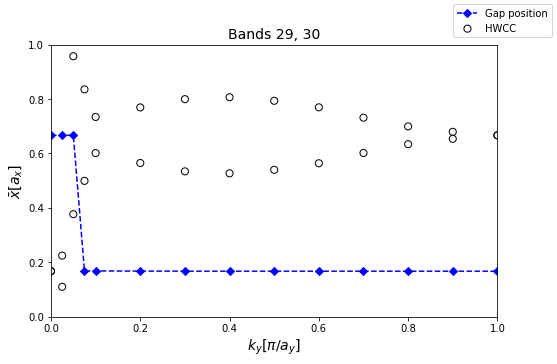

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8,5))
wcc_settings={'s': 50., 'lw': 1., 'facecolor': 'none', 'edgecolors': 'k', 'label':'HWCC'}
gap_settings={'marker': 'D', 'color': 'b', 'linestyle': '--', 'label':'Gap position'}

z2pack.plot.wcc(result_hocc, axis=ax, wcc_settings=wcc_settings, gap_settings=gap_settings)
ax.set_title('Bands 29, 30', fontsize=14)
ax.set_ylabel(r'$\bar{x} [a_x]$', fontsize=14)
ax.set_xlabel(r'$k_y [\pi/a_y]$', fontsize=14)
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())
plt.show()

## Exercise:
1. To familiarize ourselves with the different options, we should play with them. For this, we can use a small number of grid-lines and try different combinations of parameters. Even if a calculation did not converge, the HWCCs can be visualized. This allows us to see why a certain convergence check failed.

2. We can calculate the $\mathbb{Z}_2$ invariant for the whole system. In the last exercise (TI-01) we visualized the band structure. We can go back and adjust the range on the y-axis to get an idea of which sets of bands are isolated from others. There are different ways of splitting bands in sets, but all should give the same invariant when they are summed.

### 2 a) Running the 30 lower bands at once:

In [10]:
system_lower = z2pack.hm.System(
        hamilton=Hk,
        hermitian_tol=1e-5,
        basis_overlap=Sk,
        pos=pos,
        bands=range(30),
)
settings = {'num_lines': 11,
            'pos_tol': 1e-2,
            'gap_tol': 2e-2,
            'move_tol': 0.3,
            'iterator': range(8, 58, 2),
            'min_neighbour_dist': 1e-3,
            'load': False,
}

result = z2pack.surface.run(
    system=system_lower,
    surface=surface,
    save_file='./res_lower.json',
    **settings
)


+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2021-04-07 12:35:15,903                                |
|   running Z2Pack version 2.2.0                                       |
|                                                                      |
|   gap_tol:            0.02                                           |
|   init_result:        None                                           |
|   iterator:           range(8, 58, 2)                                |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.001                                          |
|   move_tol:           0.3                       

In [12]:
print("Z2 invariant of the full system : {}".format(
    z2pack.invariant.z2(result)
))

Z2 invariant of the full system : 1


### 2 b) Running for isolated bundles of bands

In [42]:
settings = {'num_lines': 11,
            'pos_tol': 1e-2,
            'gap_tol': 2e-2,
            'move_tol': 0.3,
            'iterator': range(8, 27, 2),
            'min_neighbour_dist': 1e-2,
            'load': False,
}

bundles = ([0,1], [2,3,4,5],) + tuple([2*i, 2*i+1] for i in range(3,15))
Z2 = np.zeros((len(bundles),), dtype=int)
for bundle in bundles:
    system = z2pack.hm.System(
            hamilton=Hk,
            hermitian_tol=1e-5,
            basis_overlap=Sk,
            pos=pos,
            bands=bundle,
    )

    result = z2pack.surface.run(
        system=system,
        surface=surface,
        **settings
    )
    Z2[i] = z2pack.invariant.z2(result)




+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2021-04-07 12:52:00,939                                |
|   running Z2Pack version 2.2.0                                       |
|                                                                      |
|   gap_tol:            0.02                                           |
|   init_result:        None                                           |
|   iterator:           range(8, 27, 2)                                |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.01                                           |
|   move_tol:           0.3                       


+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2021-04-07 12:52:05,158                                |
|   running Z2Pack version 2.2.0                                       |
|                                                                      |
|   gap_tol:            0.02                                           |
|   init_result:        None                                           |
|   iterator:           range(8, 27, 2)                                |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.01                                           |
|   move_tol:           0.3                       


+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2021-04-07 12:52:11,031                                |
|   running Z2Pack version 2.2.0                                       |
|                                                                      |
|   gap_tol:            0.02                                           |
|   init_result:        None                                           |
|   iterator:           range(8, 27, 2)                                |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.01                                           |
|   move_tol:           0.3                       


+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 3s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|                                                                      |
|                         Line Convergence                             |
|                         ================                             |
|                                                                      |
|                             PosCheck                                 |
|                             --------                                 |
|                             PASSED: 12 of 12    

INFO: Adding lines required by 'num_lines'.
INFO: Adding line at t = 0.0
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.1
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.2
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.30000000000000004
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.4
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.5
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6000000000000001
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7000000000000001
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8
INFO:       Calcu

INFO: Adding lines required by 'num_lines'.
INFO: Adding line at t = 0.0
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.1
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.2
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.30000000000000004
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.4
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.5
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6000000000000001
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7000000000000001
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO:       Calculating line for N = 12
INFO: 

INFO: Convergence criteria fulfilled for 13 of 13 neighbouring lines.

+----------------------------------------------------------------------+
|                   Calculation finished in 0h 0m 5s                   |
+----------------------------------------------------------------------+
+----------------------------------------------------------------------+
|                         ==================                           |
|                         CONVERGENCE REPORT                           |
|                         ==================                           |
|                                                                      |
|                         Line Convergence                             |
|                         ================                             |
|                                                                      |
|                             PosCheck                                 |
|                             --------               

INFO: Adding lines required by 'num_lines'.
INFO: Adding line at t = 0.0
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.1
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.2
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.30000000000000004
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.4
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.5
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.6000000000000001
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.7000000000000001
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.8
INFO:       Calcu

In [49]:
for i, bundle in enumerate(bundles):
    print("{:13s}: {:1d}".format(str(bundle), Z2[i]))
print('-'*17)
print('Sum          : {:1d}'.format(np.sum(Z2) % 2))

[0, 1]       : 0
[2, 3, 4, 5] : 0
[6, 7]       : 0
[8, 9]       : 0
[10, 11]     : 0
[12, 13]     : 0
[14, 15]     : 0
[16, 17]     : 0
[18, 19]     : 0
[20, 21]     : 0
[22, 23]     : 0
[24, 25]     : 0
[26, 27]     : 0
[28, 29]     : 1
-----------------
Sum          : 1


## Learned methods
- Using ``lambda`` expressions to define simple functions
- Determining $\mathbb{Z}_2$ invariants from ``SIESTA`` outputs with ``sisl`` and ``Z2Pack``
- Visualizing HWCCs and *largest gap* centers
- Controlling convergence criteria of Z2Pack